In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# pd.set_option('max_colwidth', 50)
# set this if you need to

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [2]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses.head(10)
# dtype casts the column as a specific data type

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882.0,NaN,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024.0,10/10/2001,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114
5,48,ART'S CAFE,747 IRVING St,SAN FRANCISCO,94122,37.764013,-122.465749,NaN,H24,318022.0,NaN,YOON HAE RYONG,1567 FUNSTON AVE,SAN FRANCISCO,CA,94122
6,50,SUSHI ZONE,1815 Market St.,SF,94103,37.771437,-122.423892,+14155621114,H24,NaN,NaN,"AOYAMA, KIMIAKI",246 Ney Vst,SF,CA,94112
7,54,RHODA GOLDMAN PLAZA,2180 POST St,S.F.,94115,37.784626,-122.437734,+14155345060,H24,417778.0,NaN,RHODA GOLDMAN PLAZA,2180 POST St,S.F.,CA,94115
8,56,CAFE X + O,1799 Church St,SF,94131,37.742325,-122.426476,+14155823535,H24,347603.0,NaN,"BOUSIAKIS, ADAM",1799 CHURCH,SF,CA,94131
9,58,Oasis Grill,91 Drumm St,San Francisco,94111,37.794483,-122.396584,NaN,H24,954377.0,NaN,Mohammad Zughaiyir,91 Drumm St,San Francisco,CA,94111


In [3]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
inspections.head()

,business_id,Score,date,type
0,10,NaN,20140807,Reinspection/Followup
1,10,94.0,20140729,Routine - Unscheduled
2,10,NaN,20140124,Reinspection/Followup
3,10,92.0,20140114,Routine - Unscheduled
4,19,94.0,20141110,Routine - Unscheduled


In [4]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
violations.head(1)

,business_id,date,ViolationTypeID,risk_category,description
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings


In [5]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html

business_inspections = pd.merge(businesses, inspections, how='outer', on=['business_id'])

#restaurant_scores = restaurant_scores.merge(violations)
#restaurant_scores

restaurant_scores = pd.merge(business_inspections, violations, how='outer', on=['business_id', 'date'])
restaurant_scores.isnull().sum()

business_id                 0
name                      266
address                   264
city                     9785
postal_code              1693
latitude                16782
longitude               16782
phone_number            42398
TaxCode                   272
business_certificate     7265
application_date        15543
owner_name                368
owner_address             436
owner_city                518
owner_state               524
owner_zip                 662
Score                   17250
date                     1602
type                     1651
ViolationTypeID         15088
risk_category           15100
description             15100
dtype: int64

In [6]:
# 2 Which ten business have had the most inspections?

inspections_count = restaurant_scores[['business_id','type']].groupby('business_id').count().sort_values(by='type',ascending=False)
#top10 = restaurant_scores['business_id', ]

inspections1 = inspections_count.reset_index()
inspections1 = inspections1.merge(businesses[['business_id','name']])

inspections1.head(10)

,business_id,type,name
0,10238.0,69,King of Thai Noodle House
1,75139.0,66,Hakka Restaurant
2,71385.0,66,Yama Sushi Restaurant
3,2945.0,62,New Sun Hong Kong Restaurant
4,77693.0,62,SH Dream Inc
5,67154.0,60,RIVERSIDE SEAFOOD RESTAURANT
6,64176.0,59,Dragon River Restaurant
7,3151.0,59,New Asia Restaurant
8,63082.0,58,The Brick Yard
9,489.0,55,Dol-Ho Restaurant


In [7]:
# 3 Group and count the inspections by type

inspections_type = restaurant_scores[['type','business_id']].groupby('type').count().sort_values(by='business_id',ascending=False)
inspections_type

,business_id
type,
Routine - Unscheduled,42222
Reinspection/Followup,6043
Complaint,3155
New Ownership,2665
New Construction,1643
Non-inspection site visit,1008
Foodborne Illness Investigation,246
Complaint Reinspection/Followup,168
Structural Inspection,142


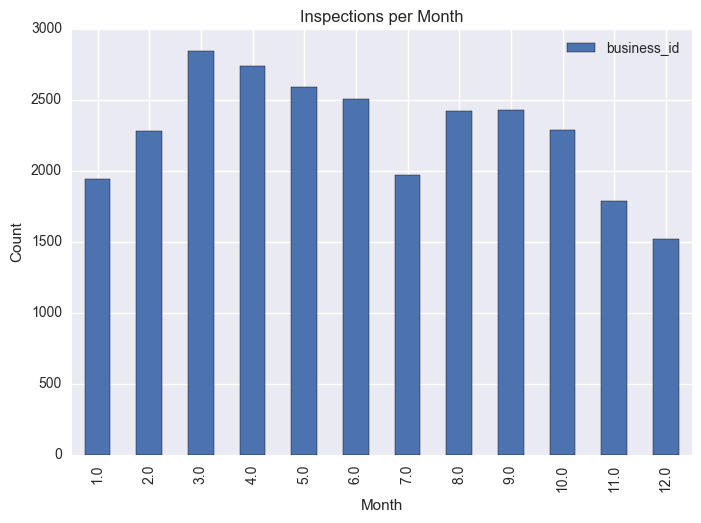

In [8]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap

month = []
#business_inspections.head(5)
for date in business_inspections['date']:
    date = str(date)[4:6]
    if date != "":
        date = int(date)
    else:
        date = None
    month.append(date)
    
business_inspections['month']=month

#business_inspections.head(5)

business_inspections[['month','business_id']].groupby('month').count().plot(kind='bar', by='month', title='Inspections per Month')
plt.xlabel('Month')
plt.ylabel('Count')

biz_month = business_inspections[['month','business_id']].groupby('month').count()
biz_month = biz_month.reset_index()

#print biz_month




In [9]:

month_type = business_inspections[['month','type']].groupby(['month','type']).size()

month_type = month_type.reset_index()
month_type.rename(columns= {0:'count'}, inplace = True)

month_type.head()

#month_type.plot(x='type',y='month',kind='scatter', title='Inspections per Month')
#plt.xlabel('type')
#plt.ylabel('month')

,month,type,count
0,1.0,Complaint,139
1,1.0,Complaint Reinspection/Followup,13
2,1.0,Foodborne Illness Investigation,10
3,1.0,New Construction,131
4,1.0,New Ownership,164


In [10]:
# 5 Which zip code contains the most high risk violations?

zips = restaurant_scores[restaurant_scores.risk_category=='High Risk'][['postal_code','risk_category']]
zips.groupby('postal_code').count().head().sort_values(by='risk_category', ascending = False)

,risk_category
postal_code,
94103,569
94102,450
94014,6
00000,4
94101,4


In [11]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?
owner = restaurant_scores[restaurant_scores.type == 'New Ownership'][['business_id','risk_category']]
owner.groupby('risk_category').count()

,business_id
risk_category,
High Risk,148
Low Risk,553
Moderate Risk,419


In [12]:
# 7 Examining the descriptions, what is the most common violation?

restaurant_scores[['description','business_id']].groupby('description').count().sort_values(by='business_id',ascending=False)

,business_id
description,
Unclean or degraded floors walls or ceilings,3757
Moderate risk food holding temperature,2873
Inadequate and inaccessible handwashing facilities,2701
Unapproved or unmaintained equipment or utensils,2610
Wiping cloths not clean or properly stored or inadequate sanitizer,2514
Unclean nonfood contact surfaces,2470
Inadequately cleaned or sanitized food contact surfaces,2458
Improper food storage,2345
Foods not protected from contamination,2039


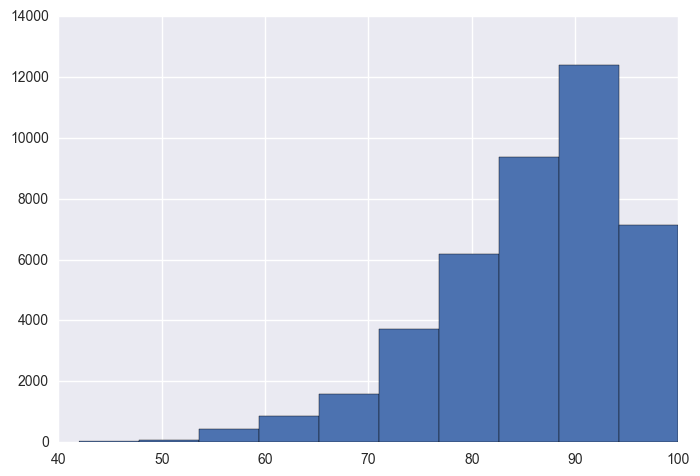

In [13]:
# 8 Create a hist of the scores with 10 bins

restaurant_scores.Score.hist(bins=10)

In [14]:
# 9 Can you predict risk category based on the other features in this dataset?

#score, violation type ID, date of inspection, date of violation

scores_df = inspections.merge(violations)
scores_df = scores_df.dropna()
scores_df.isnull().sum()

business_id        0
Score              0
date               0
type               0
ViolationTypeID    0
risk_category      0
description        0
dtype: int64

In [15]:

X = scores_df[['Score','ViolationTypeID']]
y = scores_df.risk_category

X.head()

,Score,ViolationTypeID
0,94.0,103129
1,94.0,103144
2,92.0,103154
3,92.0,103119
4,92.0,103145


In [16]:
#scores_df.head()


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
knn.score(X, y)

0.99971537983854275

In [17]:
scores = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, y)
    scores.append(knn.score(X, y))
    
scores

[1.0,
 0.99981887807907266,
 0.99971537983854275,
 0.9996636307182778,
 0.99935313599668807,
 0.99932726143655559,
 0.99935313599668807,
 0.99935313599668807,
 0.99914613951562825,
 0.99914613951562825,
 0.99901676671496586,
 0.99901676671496586,
 0.998861519354171,
 0.99891326847443596,
 0.99875802111364109,
 0.99873214655350862,
 0.99873214655350862,
 0.99878389567377357,
 0.99857689919271375,
 0.99862864831297871,
 0.99842165183191889,
 0.99842165183191889,
 0.99836990271165393,
 0.99844752639205137,
 0.99847340095218384,
 0.99839577727178641,
 0.99831815359138898,
 0.99836990271165393,
 0.9982922790312565]

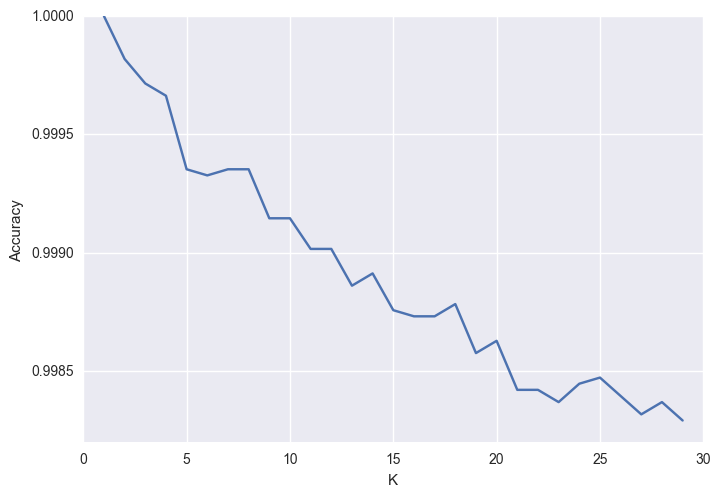

In [18]:
plt.plot(range(1,30), scores)
plt.ylabel("Accuracy")
plt.xlabel("K")

In [19]:
# 10 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/

In [20]:
############################
### A Little More Morbid ###
############################

In [21]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [22]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race

killings.rename(columns = {'lawenforcementagency':'agency', 'raceethnicity':'race'}, inplace = True)
killings.describe()

,Unnamed: 0,age,day,year,county_income
count,467.000000,467.000000,467.000000,467.0,467.000000
mean,233.000000,37.351178,15.830835,2015.0,52527.331906
std,134.955548,12.944617,8.658970,0.0,12948.263811
min,0.000000,16.000000,1.000000,2015.0,22545.000000
25%,116.500000,28.000000,8.000000,2015.0,43804.000000
50%,233.000000,35.000000,16.000000,2015.0,50856.000000
75%,349.500000,45.000000,23.000000,2015.0,56832.000000
max,466.000000,87.000000,31.000000,2015.0,110292.000000


In [23]:
# 2. Show the count of missing values in each column

killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [24]:
# 3. replace each null value in the dataframe with the string "Unknown"

killings.streetaddress.fillna(value = 'Unknown', inplace=True)

In [25]:
# 4. How many killings were there so far in 2015?

killings.year.value_counts()

2015    467
Name: year, dtype: int64

In [26]:
# 5. Of all killings, how many were male and how many female?

#killings[['name','gender']].groupby('gender').count()

killings.gender.value_counts()

Male      445
Female     22
Name: gender, dtype: int64

In [27]:
# 6. How many killings were of unarmed people?

killings[['name','armed']].groupby('armed').count()


,name
armed,
Disputed,2
Firearm,230
Knife,68
No,102
Non-lethal firearm,14
Other,26
Unknown,7
Vehicle,18


In [28]:
# 7. What percentage of all killings were unarmed?
float(killings[killings.armed == 'No']['armed'].count()) / float(killings.armed.count())

0.21841541755888652

In [29]:
# 8. What are the 5 states with the most killings?

killings[['state', 'name']].groupby('state').count().sort_values(by= 'name',ascending=False).head()

,name
state,
CA,74
TX,46
FL,29
AZ,25
OK,22


In [30]:
# 9. Show a value counts of deaths for each race

killings.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

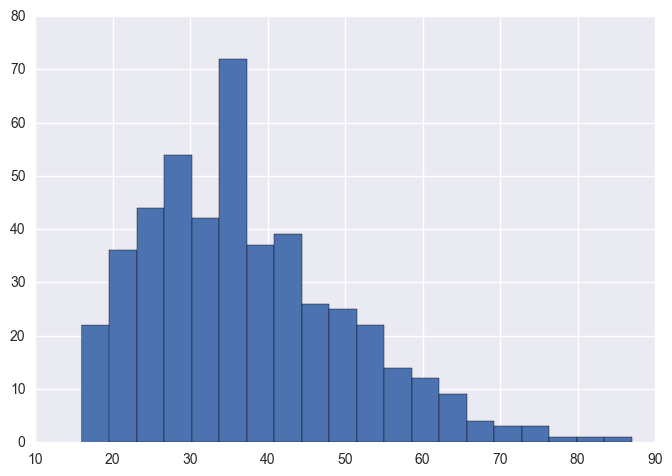

In [31]:
# 10. Display a histogram of ages of all killings

killings.age.hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E876898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000EDA1FD0>]], dtype=object)

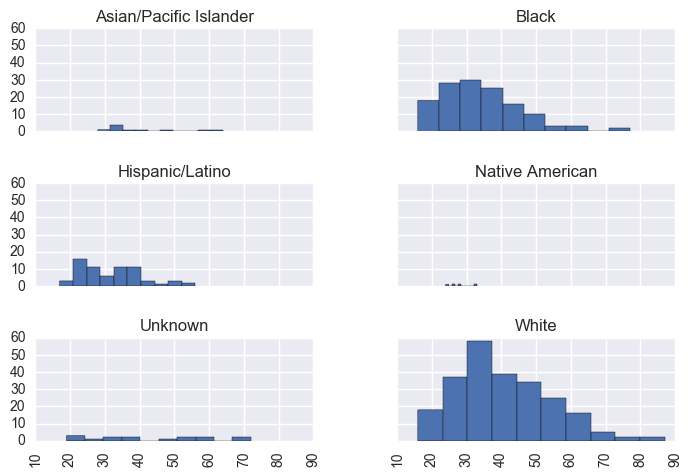

In [32]:
# 11. Show 6 histograms of ages by race

killings.age.hist(by=killings.race,bins = 10, sharex=True, sharey=True)

In [33]:
# 12. What is the average age of death by race?

killings[['age','race']].groupby('race').mean()

,age
race,
Asian/Pacific Islander,40.800000
Black,34.044444
Hispanic/Latino,31.716418
Native American,27.750000
Unknown,43.533333
White,40.466102


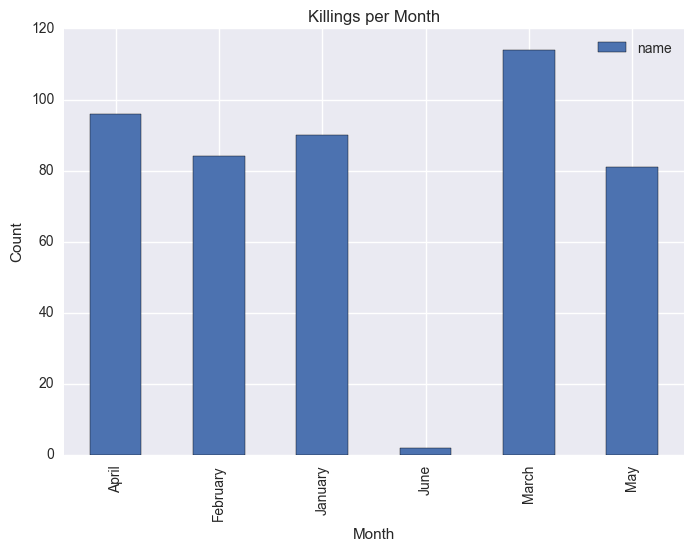

In [34]:
# 13. Show a bar chart with counts of deaths every month
killings[['month','name']].groupby('month').count().plot(kind='bar', title='Killings per Month', by=killings.month)
plt.xlabel('Month')
plt.ylabel('Count')


In [35]:
###################
### Less Morbid ###
###################

In [36]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [37]:
# 1. Delete the columns (employed_full_time_year_round, major_code)

del majors['Employed_full_time_year_round']
del majors['Major_code']

In [38]:
# 2. Show the count of missing values in each column

majors.isnull().sum()

Unnamed: 0           0
Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

In [39]:
# 3. What are the top 10 highest paying majors?

pay = majors[['Major', 'Median','P25th','P75th']].groupby('Major').mean().sort_values(by='Median', ascending= False)
maj_cat = majors[['Major','Major_category']]

pay = pay.reset_index()
pay=pay.merge(maj_cat)

pay.head(10)

,Major,Median,P25th,P75th,Major_category
0,PETROLEUM ENGINEERING,125000,75000,210000.0,Engineering
1,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,106000,78000,125000.0,Health
2,NAVAL ARCHITECTURE AND MARINE ENGINEERING,97000,60000,125000.0,Engineering
3,METALLURGICAL ENGINEERING,96000,65000,123000.0,Engineering
4,NUCLEAR ENGINEERING,95000,65000,128000.0,Engineering
5,MINING AND MINERAL ENGINEERING,92000,52000,124000.0,Engineering
6,MATHEMATICS AND COMPUTER SCIENCE,92000,53000,136000.0,Computers & Mathematics
7,ELECTRICAL ENGINEERING,88000,60000,116000.0,Engineering
8,CHEMICAL ENGINEERING,86000,60000,120000.0,Engineering
9,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,85000,55000,125000.0,Engineering


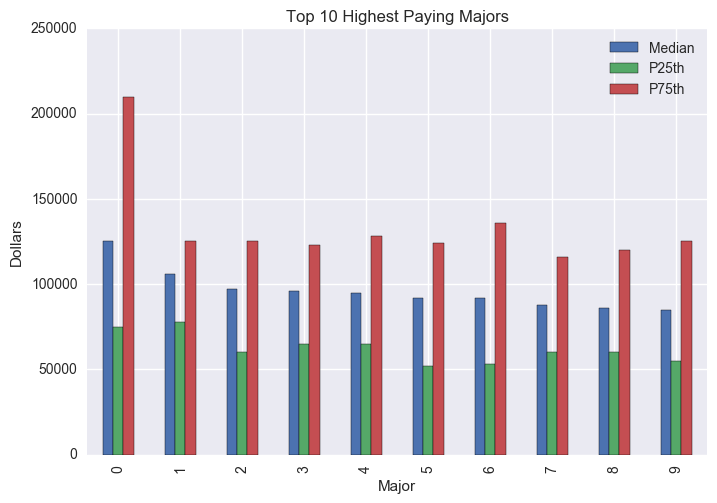

In [40]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!

pay.head(10).plot(kind='bar', title='Top 10 Highest Paying Majors', by=pay.Median)
plt.xlabel('Major')
plt.ylabel('Dollars')

In [41]:
# 5. What is the average median salary for each major category?

pay_cat = pay[['Median','Major_category']].groupby('Major_category').mean().sort_values(by='Median',ascending=False)
pay_cat

,Median
Major_category,
Engineering,77758.620690
Computers & Mathematics,66272.727273
Physical Sciences,62400.000000
Business,60615.384615
Health,56458.333333
Agriculture & Natural Resources,55000.000000
Social Science,53222.222222
Law & Public Policy,52800.000000
Industrial Arts & Consumer Services,52642.857143


In [42]:
# 6. Show only the top 5 paying major categories

pay_cat = pay_cat.reset_index()
pay_cat.head()

,Major_category,Median
0,Engineering,77758.620690
1,Computers & Mathematics,66272.727273
2,Physical Sciences,62400.000000
3,Business,60615.384615
4,Health,56458.333333


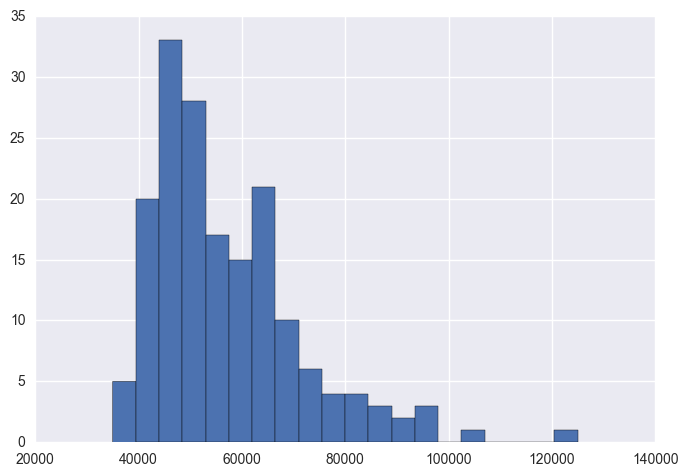

In [43]:
# 7. Plot a histogram of the distribution of median salaries

pay.Median.hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011E2F4E0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000012CDB898>]], dtype=object)

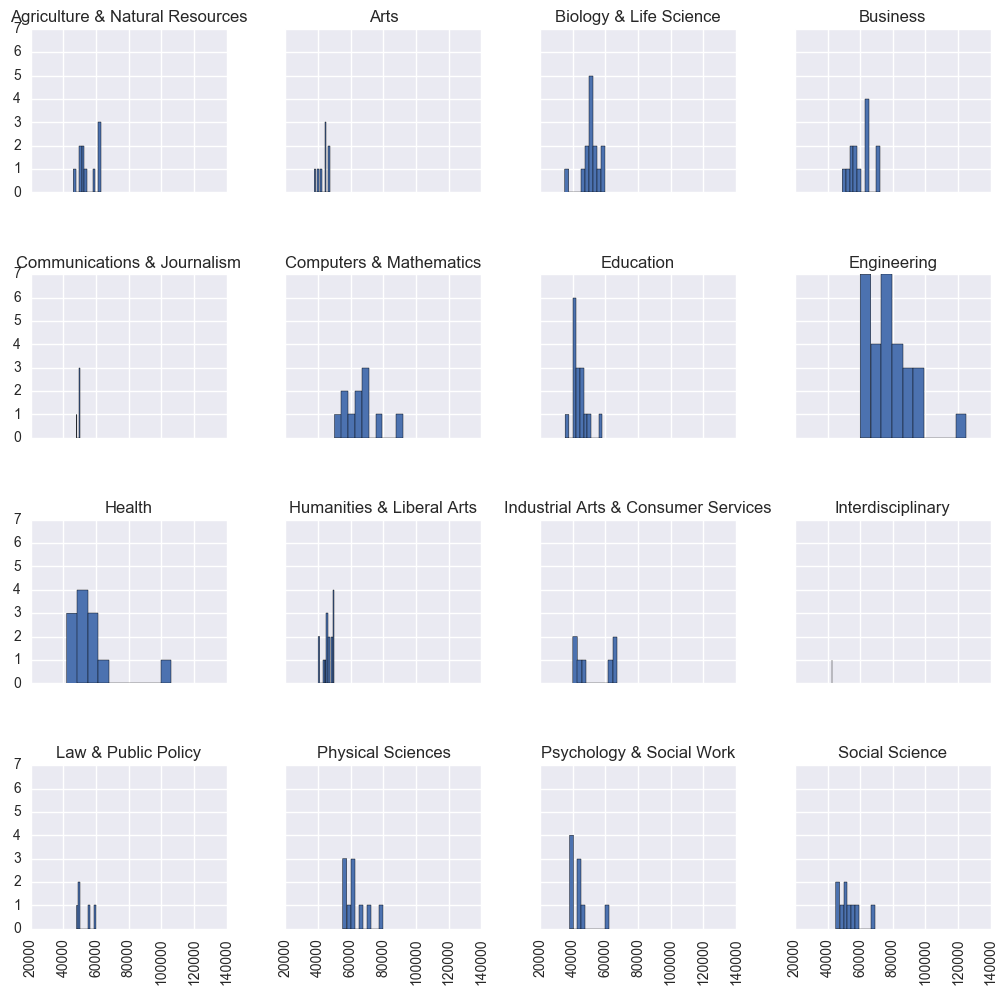

In [44]:
# 8. Plot a histogram of the distribution of median salaries by major category

pay.Median.hist(by=pay.Major_category, sharex=True, sharey=True, figsize = (12,12))

In [45]:
# 9. What are the top 10 most UNemployed majors?

employ = majors[['Major','Major_category','Total','Employed','Unemployed','Unemployment_rate']]
employ.head(10).sort_values(by='Unemployed',ascending=False)

,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate
8,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,4736,0.051290
3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679
0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147
1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636
9,FORESTRY,Agriculture & Natural Resources,69447,48228,2144,0.042563
5,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,2070,0.031791
4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188
2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248
6,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,264,0.050867
7,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,8549,6392,261,0.039230


In [46]:
# What are the unemployment rates?
employ.head(10).sort_values(by='Unemployment_rate',ascending=False)

,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate
8,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,4736,0.051290
6,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,264,0.050867
4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188
3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679
9,FORESTRY,Agriculture & Natural Resources,69447,48228,2144,0.042563
7,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,8549,6392,261,0.039230
5,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,2070,0.031791
2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248
1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636
0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147


In [47]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category

print employ[['Major_category','Unemployed','Unemployment_rate']].groupby('Major_category').mean().sort_values(by='Unemployed',ascending=False).head(10)

# What are the unemployment rates?
print employ[['Major_category','Unemployed','Unemployment_rate']].groupby('Major_category').mean().sort_values(by='Unemployment_rate',ascending=False).head(10)

                               Unemployed  Unemployment_rate
Major_category                                              
Business                     33415.153846           0.054496
Communications & Journalism  25299.750000           0.069125
Social Science               14683.333333           0.065686
Arts                         13015.625000           0.087601
Humanities & Liberal Arts    11942.400000           0.069429
Psychology & Social Work     11578.444444           0.077867
Law & Public Policy           8609.800000           0.067854
Education                     7833.500000           0.046762
Computers & Mathematics       7270.363636           0.059437
Health                        6251.083333           0.047209
                                       Unemployed  Unemployment_rate
Major_category                                                      
Arts                                 13015.625000           0.087601
Psychology & Social Work             11578.444444           0

In [48]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042

employ['sample_employment_rate'] = employ.Employed / employ.Total
employ.head()

C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,sample_employment_rate
0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,0.704225
1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,0.806338
2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,0.775173
3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,0.783948
4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,0.711738


In [50]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"
employ['sample_unemployment_rate'] = 1 - employ['sample_employment_rate']

employ.head()

C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,sample_employment_rate,sample_unemployment_rate
0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,0.704225,0.295775
1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,0.806338,0.193662
2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,0.775173,0.224827
3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,0.783948,0.216052
4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,0.711738,0.288262
